In [233]:
from pandas import *
import numpy
import matplotlib.pyplot as plt
from random import shuffle  # Import shuffle

(17, 17)
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1]
 [1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1]
 [1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1]
 [1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1]
 [1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1]
 [1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1]
 [1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1]
 [1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1]
 [1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1]
 [1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1]
 [1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1]
 [1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1]
 [1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1]
 [1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1]
 [1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


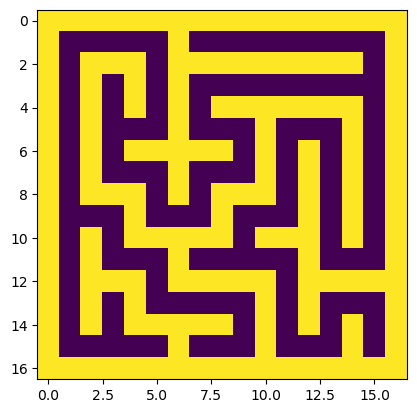

In [234]:
def make_maze(w, h):
    vis = [[0] * w + [1] for _ in range(h)] + [[1] * (w + 1)]
    ver = [["10"] * w + ['1'] for _ in range(h)] + [[]]
    hor = [["11"] * w + ['1'] for _ in range(h + 1)]

    def walk(x, y):
        vis[y][x] = 1

        d = [(x - 1, y), (x, y + 1), (x + 1, y), (x, y - 1)]
        shuffle(d)
        for (xx, yy) in d:
            if vis[yy][xx]: continue
            if xx == x: hor[max(y, yy)][x] = "10"
            if yy == y: ver[y][max(x, xx)] = "00"
            walk(xx, yy)

    walk(numpy.random.randint(w), numpy.random.randint(h))

    s = ""
    for (a, b) in zip(hor, ver):
        s += ''.join(a + ['\n'] + b + ['\n'])

    M=[]
    for line in s.split("\n"):
        if line!="":
            R=[]
            for e in line:
                R.append(int(e))
            M.append(R)
    return M

maze=numpy.array(make_maze(8,8))
plt.imshow(maze)

print(maze.shape)
print(maze)

In [235]:
#maze
startLocation=[1,1]
targetLocation=[15,15]

In [236]:
maze[1][1]

0

In [237]:
maze[15][15] ## Should always output 0 otherwise maze is unsolvable

0

In [238]:
def getNeighbors(current, grid):
    x, y = current
    neighbors = []
    xm = [0, 1, 0, -1]  # Directions: Right, Down, Left, Up
    ym = [1, 0, -1, 0]

    for i in range(4):
        nx, ny = x + xm[i], y + ym[i]

        # Check if the neighbor is within bounds and is a walkable cell (1)
        if 0 <= nx < len(grid) and 0 <= ny < len(grid[0]) and grid[nx][ny] == 0:
            neighbors.append((nx, ny))  # Use tuples instead of lists

    return neighbors


In [239]:
def calculateActualCost(current_node, neighbor_node):
    return 1  # Uniform movement cost

In [240]:
def calculateHeuristicCost(current_node, goal_node):
    x1, y1 = current_node
    x2, y2 = goal_node
    return abs(x1 - x2) + abs(y1 - y2)
    

In [241]:
from queue import PriorityQueue

def a_star_search(grid, start_pos, goal_pos):
    """
    Perform A* search on a grid.
    
    Args:
        grid: 2D list representing the maze. 0 = pathway (walkable), 1 = wall.
        start_pos: Tuple (x, y) for the start position.
        goal_pos: Tuple (x, y) for the goal position.
        
    Returns:
        A tuple (came_from, cost_so_far) where:
            - came_from: Dictionary tracking the path.
            - cost_so_far: Dictionary of costs to reach each node.
    """
    # Initialize priority queue, path tracking, and costs
    frontier = PriorityQueue()
    frontier.put((0, start_pos))  # (priority, node)
    came_from = {start_pos: None}
    cost_so_far = {start_pos: 0}

    while not frontier.empty():
        # Get the node with the lowest priority (i.e., lowest f-cost)
        _, current = frontier.get()

        # Stop if we reached the goal
        if current == goal_pos:
            break

        # Explore neighbors
        for next in getNeighbors(current, grid):
            # Calculate new cost to reach this neighbor
            new_cost = cost_so_far[current] + calculateActualCost(current, next)

            # If this neighbor hasn't been visited or if we found a cheaper path to it
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost  # Update cost
                priority = new_cost + calculateHeuristicCost(next, goal_pos)  # f-cost = g + h
                frontier.put((priority, next))  # Add to the priority queue
                came_from[next] = current  # Track the path

    return came_from, cost_so_far

In [242]:
grid = maze
start_pos = (1,1)
goal_pos = (15,15)
came_from, cost_so_far = a_star_search(maze, start_pos, goal_pos)

print(f"Came from: {came_from}")
print(f"Cost so far: {cost_so_far}")

Came from: {(1, 1): None, (1, 2): (1, 1), (2, 1): (1, 1), (1, 3): (1, 2), (1, 4): (1, 3), (1, 5): (1, 4), (2, 5): (1, 5), (3, 1): (2, 1), (3, 5): (2, 5), (4, 1): (3, 1), (4, 5): (3, 5), (5, 1): (4, 1), (5, 5): (4, 5), (6, 1): (5, 1), (5, 4): (5, 5), (7, 1): (6, 1), (8, 1): (7, 1), (9, 1): (8, 1), (9, 2): (9, 1), (10, 1): (9, 1), (9, 3): (9, 2), (10, 3): (9, 3), (11, 1): (10, 1), (11, 3): (10, 3), (12, 1): (11, 1), (11, 4): (11, 3), (11, 5): (11, 4), (12, 5): (11, 5), (13, 1): (12, 1), (13, 5): (12, 5), (14, 1): (13, 1), (13, 6): (13, 5), (13, 7): (13, 6), (13, 8): (13, 7), (13, 9): (13, 8), (14, 9): (13, 9), (15, 1): (14, 1), (15, 9): (14, 9), (15, 2): (15, 1), (15, 3): (15, 2), (15, 4): (15, 3), (14, 3): (15, 3), (15, 5): (15, 4), (15, 8): (15, 9), (5, 3): (5, 4), (13, 3): (14, 3), (15, 7): (15, 8), (6, 3): (5, 3), (4, 3): (5, 3), (7, 3): (6, 3), (7, 4): (7, 3), (7, 5): (7, 4), (8, 5): (7, 5), (9, 5): (8, 5), (9, 6): (9, 5), (9, 7): (9, 6), (8, 7): (9, 7), (3, 3): (4, 3), (7, 7): (8, 

In [243]:
def visualize_maze_with_path(maze, path):
    plt.figure(figsize=(8, 8))
    plt.imshow(maze, cmap="gray_r")

    # Extract x and y coordinates for the path
    y_coords, x_coords = zip(*path)

    # Plot the path as red dots
    plt.scatter(x_coords, y_coords, color="red", label="Path", zorder=5)
    plt.legend()
    plt.title("A* Search Path")
    plt.show()

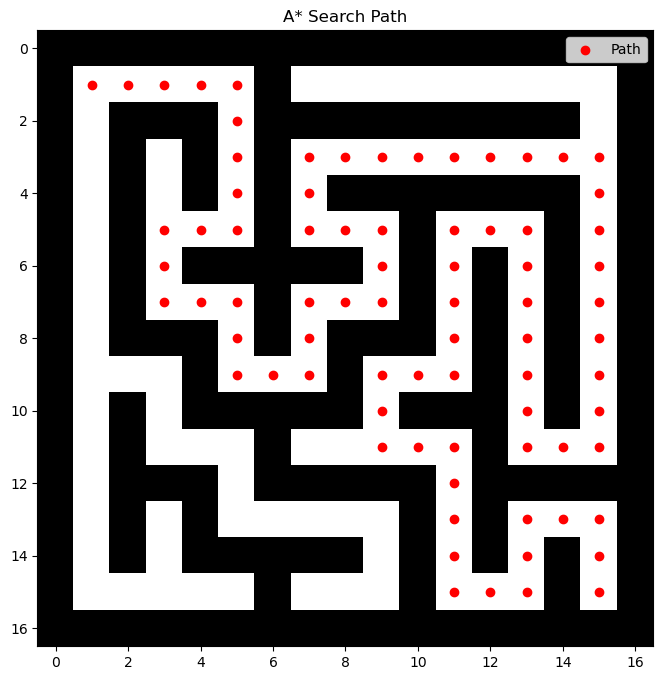

In [244]:
# Reconstruct the path from start to goal
path = []
current = goal_pos
while current:
    path.append(current)
    current = came_from[current]
path.reverse()

# Visualize the maze with the path
visualize_maze_with_path(maze, path)